# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [ ]:
import tensorflow
print (tensorflow.__version__)

2.7.0


# Download and Unzip data

In [ ]:
!unzip /content/drive/MyDrive/CS115/data/anime.zip -d /content/

In [ ]:
import glob
files = glob.glob('/content/images/*.jpg')
len(files)

63565

In [ ]:
for file in files[:10]:
    anime_img = cv2.imread(file)
    print (anime_img.shape)

# Display Data Samples

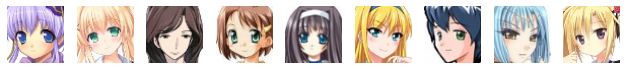

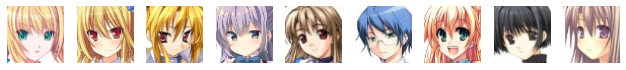

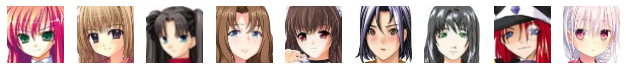

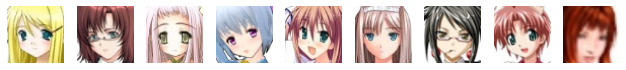

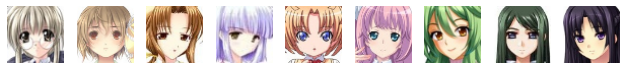

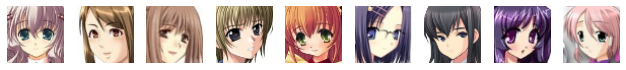

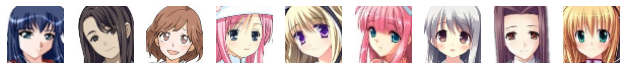

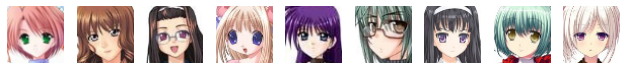

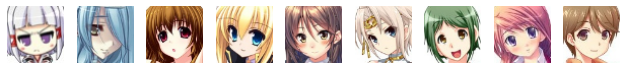

In [ ]:
for k in range(9):
    plt.figure(figsize=(11, 11))
    for j in range(9):
        f = np.random.choice(files)
        anime_img = cv2.imread(f)
        anime_img = cv2.cvtColor(anime_img, cv2.COLOR_BGR2RGB)
        anime_img = cv2.resize(anime_img, (56, 56))
        plt.subplot(990 + 1 + j)
        plt.imshow(anime_img)
        plt.axis('off')
    plt.show()

# Data Preparation

In [ ]:
from tqdm import tqdm_notebook

images = []
for file in tqdm_notebook(files):
    anime_img = cv2.imread(file)
    anime_img = cv2.cvtColor(anime_img, cv2.COLOR_BGR2RGB)
    anime_img = cv2.resize(anime_img, (56, 56))
    images.append((anime_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/63565 [00:00<?, ?it/s]

(63565, 56, 56, 3)


# Define Generator Model

In [ ]:
random_input = tensorflow.keras.layers.Input(shape = 100)

x = tensorflow.keras.layers.Dense(128 * 5 * 5)(random_input)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Reshape((5, 5, 128))(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(4,4))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=3, kernel_size=(3,3))(x)
generated_image = tensorflow.keras.layers.Activation('tanh')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 3200)              323200    
                                                                 
 activation_2 (Activation)   (None, 3200)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 3200)             12800     
 hNormalization)                                                 
                                                                 
 reshape_1 (Reshape)         (None, 5, 5, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 11, 11, 128)      147584    
 nspose)                                                   

# Define Discriminator

In [ ]:
image_input = tensorflow.keras.layers.Input(shape=(56, 56, 3))

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(3,3))(image_input)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2)(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2)(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 54, 54, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        204864    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 25, 25, 64)       256       
 hNormalization)                                                 
                                                           

In [ ]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define Combined model: DCGAN

In [ ]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 model_3 (Functional)        (None, 56, 56, 3)         1866499   
                                                                 
 model_4 (Functional)        (None, 1)                 517441    
                                                                 
Total params: 2,383,940
Trainable params: 1,858,819
Non-trainable params: 525,121
_________________________________________________________________


# Compiling Models

In [ ]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [ ]:
indices = [i for i in range(0, len(images))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = images[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training DCGAN

Chỉ chạy thử, kết quả thu được dựa trên kết quả train trên server

In [ ]:
epochs = 2
batch_size = 100
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

# Results

In [ ]:
#Generating Unlimited samples

for i in range(5):
    show_generator_results(generator_network)

# Saving Generator weights

In [ ]:
generator_network.save('/content/drive/MyDrive/CS115/Notebooks/anime_DCGAN')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS115/Notebooks/anime_DCGAN/assets
